필요한 모듈 호출

In [1]:
import numpy as np
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt
%matplotlib inline

데이터 호출 및 datetime 컬럼 변수타입 지정

In [2]:
day = pd.read_csv('Day_by_Day.csv', encoding='CP949')

In [3]:
day['ymd']= pd.to_datetime(day['ymd'])

Day by Day 테이블에 존재하는 선수들의 목록을 저장

In [4]:
batter_name = day['batter_name'].unique()

장타율과 출루율을 계산하는 함수를 만든후 더해서 하루경기의 OPS를 계산한 OPS_d컬럼을 원래 dataframe에 추가

In [5]:
def OBP(x):
    try:
        out = (x['H']+ x['BB']) / (x['BB'] + x['AB'])
    except:
        out = np.nan
    return out
def SLG(x):
    try:
        return (x['H']-x['2B']-x['3B']-x['HR'] + 2*x['2B'] + 3*x['3B'] + 4*x['2B'])/x['AB']
    except:
        out = np.nan
#[단타 + (2*2루타) + (3*3루타) + (4*홈런] / 타수

day['OPS_d'] = day.apply(lambda x: SLG(x),axis=1) + day.apply(lambda x: OBP(x),axis=1)

선수의 특정년도 특정 컬럼의 시계열 그래프를 그려주는 함수 생성

In [35]:
def tsplot0(name,year,col):
    x = day[(day['ymd'].map(lambda x: x.year) == year) & ((day['batter_name']==name))]
    ts = pd.Series(x[col])
    ts.index = x['ymd']
    ts.plot()

이대호의 2018년도 일간 OPS의 분포

In [1]:
player_name = '이대호'

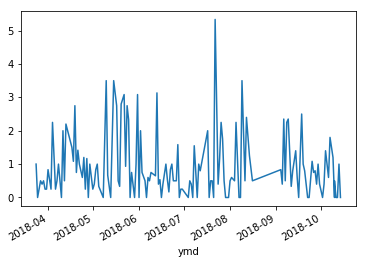

In [39]:
tsplot0(player_name,2018,'OPS_d')

전체선수에 대한 정보를 담고있는 day테이블에서 특정선수(이대호)의 정보만 가진 테이블 생성

In [37]:
PBH = day[day['batter_name']==player_name]

In [38]:
PBH.head()

,batter_id,batter_name,opposing_team,avg1,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,HBP,SO,GDP,avg2,ymd,OPS_d
61145,202,이대호,삼성,NaN,0,0,0,0,0,0,0,0,0,1,0,0,0,0.000,2001-09-19,NaN
61146,202,이대호,삼성,0.333,3,0,1,0,0,0,0,0,0,0,0,0,0,0.333,2001-09-20,0.666667
61147,202,이대호,두산,1.000,1,0,1,0,0,0,0,0,0,0,0,0,0,0.500,2001-09-22,2.000000
61148,202,이대호,삼성,1.000,1,0,1,0,0,0,0,0,0,0,0,0,0,0.600,2001-09-25,2.000000
61149,202,이대호,두산,0.500,2,0,1,0,0,0,1,0,0,0,0,1,0,0.571,2001-09-29,1.000000


prophet을 적용하기 위해 시간자료와 target값을 가지고 있는 데이터프레임 생성

In [15]:
target = 'OPS_d'
ts = PBH[['ymd',target]].reset_index().drop(columns = 'index')
ts = PBH[['ymd',target]].reset_index().drop(columns = 'index')
pts = pd.DataFrame()
pts['y'] = ts[target]
pts['ds'] = pd.to_datetime(ts['ymd'])

In [2]:
#pts[(pts['ds']<'2018-01-01') & (pts['ds']>'2017-01-01') ]

prophet을 사용해 시계열 분석을 적용

In [20]:
my_model = Prophet(interval_width = 0.8)
#my_model.fit(pts[(pts['ds']<'2018-01-01') & (pts['ds']>'2017-01-01') ])
my_model.fit(pts)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\ProgramData\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


2019년 경기일정을 등록

In [21]:
future_dates =['2019-03-23',
'2019-03-24',
'2019-03-26',
'2019-03-27',
'2019-03-28',
'2019-03-29',
'2019-03-30',
'2019-03-31',
'2019-04-02',
'2019-04-03',
'2019-04-04',
'2019-04-05',
'2019-04-06',
'2019-04-07',
'2019-04-09',
'2019-04-10',
'2019-04-11',
'2019-04-12',
'2019-04-13',
'2019-04-14',
'2019-04-16',
'2019-04-17',
'2019-04-18',
'2019-04-19',
'2019-04-20',
'2019-04-21',
'2019-04-23',
'2019-04-24',
'2019-04-25',
'2019-04-26',
'2019-04-27',
'2019-04-28',
'2019-04-30',
'2019-05-01',
'2019-05-02',
'2019-05-03',
'2019-05-04',
'2019-05-05',
'2019-05-07',
'2019-05-08',
'2019-05-09',
'2019-05-10',
'2019-05-11',
'2019-05-12',
'2019-05-14',
'2019-05-15',
'2019-05-16',
'2019-05-17',
'2019-05-18',
'2019-05-19',
'2019-05-21',
'2019-05-22',
'2019-05-23',
'2019-05-24',
'2019-05-25',
'2019-05-26',
'2019-05-28',
'2019-05-29',
'2019-05-30',
'2019-05-31',
'2019-06-01',
'2019-06-02',
'2019-06-04',
'2019-06-05',
'2019-06-06',
'2019-06-07',
'2019-06-08',
'2019-06-09',
'2019-06-11',
'2019-06-12',
'2019-06-13',
'2019-06-14',
'2019-06-15',
'2019-06-16',
'2019-06-18',
'2019-06-19',
'2019-06-20',
'2019-06-21',
'2019-06-22',
'2019-06-23',
'2019-06-25',
'2019-06-26',
'2019-06-27',
'2019-06-28',
'2019-06-29',
'2019-06-30',
'2019-07-02',
'2019-07-03',
'2019-07-04',
'2019-07-05',
'2019-07-06',
'2019-07-07',
'2019-07-09',
'2019-07-10',
'2019-07-11',
'2019-07-12',
'2019-07-13',
'2019-07-14',
'2019-07-16',
'2019-07-17',
'2019-07-18',
'2019-07-26',
'2019-07-27',
'2019-07-28',
'2019-07-30',
'2019-07-31']
future_dates = pd.DataFrame({'ds' :future_dates})
future_dates = pd.DataFrame({'ds' :pts[pts['ds']>'2018-01-01']['ds'] })

일자별 선수의 OPS를 예측

In [22]:
# predictions
forecast = my_model.predict(future_dates)

# preditions for last week
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
137,2018-10-09,0.522978,-0.580895,1.650820
138,2018-10-10,0.527276,-0.624452,1.615609
139,2018-10-10,0.527276,-0.561649,1.647594
140,2018-10-11,0.469645,-0.566640,1.598353
141,2018-10-12,0.401767,-0.707398,1.506597
142,2018-10-13,0.313945,-0.770576,1.392596
143,2018-10-14,0.196974,-0.949910,1.339221


In [23]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2018-03-24,0.594515,-0.556849,1.673588
1,2018-03-25,0.585953,-0.557886,1.649683
2,2018-03-27,0.439588,-0.627442,1.547208
3,2018-03-28,0.527023,-0.471972,1.616885
4,2018-03-29,0.567856,-0.556554,1.689778


시계열 그래프를 확인해보기 위한 함수

In [24]:
def tsplot(x):
    ts = pd.Series(x['yhat'])
    ts.index = x['ds']
    ts.plot()

In [25]:
def tsplot2(x):
    ts = pd.Series(x['y'])
    ts.index = x['ds']
    ts.plot()

예측한 일간 OPS의 분포

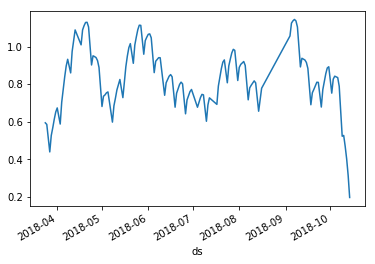

In [26]:
tsplot(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

예측한 일간 OPS의 평균

In [27]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].mean()

yhat          0.832422
yhat_lower   -0.272399
yhat_upper    1.930522
dtype: float64

실제 일간 OPS의 평균

In [28]:
pts[pts['ds']>'2018-01-01'].mean()

y    0.922801
dtype: float64

실제 OPS의 분포

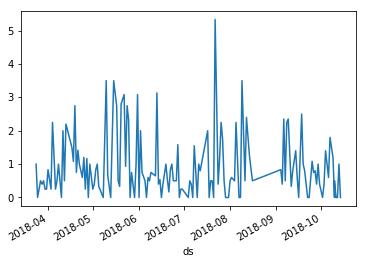

In [29]:
tsplot2(pts[pts['ds']>'2018-01-01'])

In [30]:
pts[pts['ds']>'2018-01-01']

,y,ds
1292,1.000000,2018-03-24
1293,0.000000,2018-03-25
1294,0.500000,2018-03-27
1295,0.400000,2018-03-28
1296,0.500000,2018-03-29
1297,0.250000,2018-03-30
1298,0.250000,2018-03-31
1299,0.833333,2018-04-01
1300,0.250000,2018-04-03
1301,2.250000,2018-04-04


기타 시각화 자료

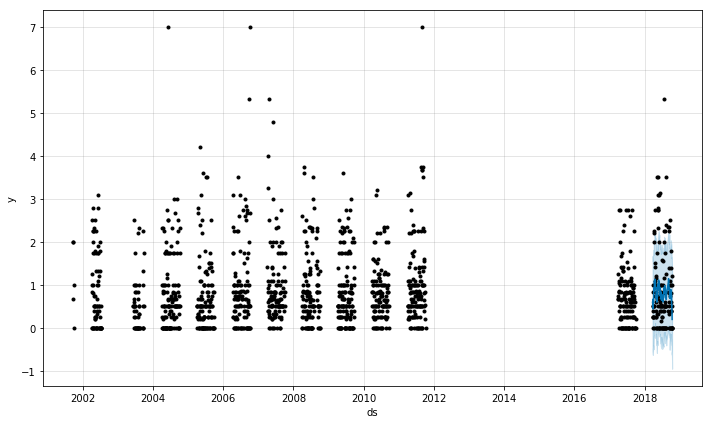

In [31]:
# visualizing predicions
#fc = forecast[['ds', 'yhat']].rename(columns = {'Date': 'ds', 'Forecast': 'yhat'})
my_model.plot(forecast);

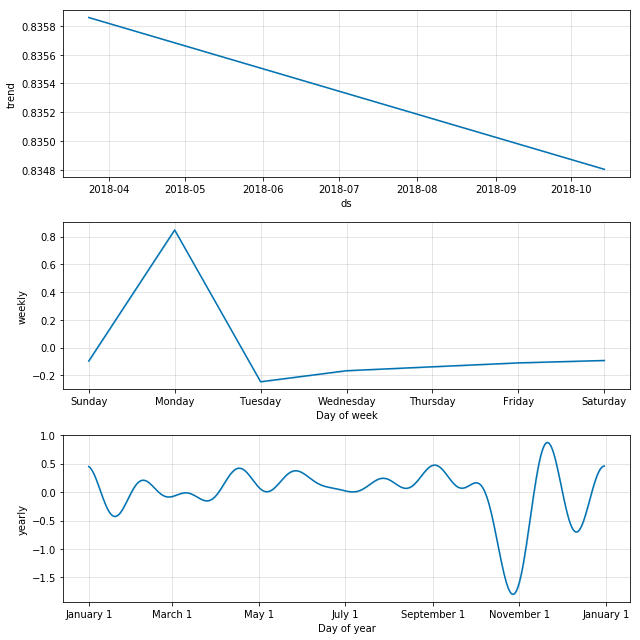

In [32]:
my_model.plot_components(forecast);